## Keras Logistic Regression (data mnist)

In [1]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
import numpy
import pandas as pd

Using TensorFlow backend.


### Display Data

In [2]:
import matplotlib.pyplot as plt
# load (downloaded if needed) the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_test[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_test[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_test[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_test[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

<Figure size 640x480 with 4 Axes>

In [3]:
seed = 7
numpy.random.seed(seed)

### flatten array 28*28 images to a 784 vector for each image

In [4]:

num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

### Normalize data from 0-255 to 0-1

In [5]:

X_train = X_train / 255
X_test = X_test / 255

In [6]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

### Build Model

In [14]:
def baseline_model(input_dim, output_dim):
    model = Sequential()
    model.add(Dense(output_dim, input_dim=input_dim, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
    return model

In [15]:
model = baseline_model(784,10)

### Train the model

In [16]:
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=200, verbose=2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
 - 2s - loss: 1.4499 - acc: 0.6641 - val_loss: 0.9691 - val_acc: 0.8255
Epoch 2/100
 - 1s - loss: 0.8457 - acc: 0.8297 - val_loss: 0.7125 - val_acc: 0.8533
Epoch 3/100
 - 1s - loss: 0.6809 - acc: 0.8488 - val_loss: 0.6070 - val_acc: 0.8676
Epoch 4/100
 - 1s - loss: 0.6011 - acc: 0.8584 - val_loss: 0.5475 - val_acc: 0.8755
Epoch 5/100
 - 1s - loss: 0.5525 - acc: 0.8657 - val_loss: 0.5090 - val_acc: 0.8785
Epoch 6/100
 - 1s - loss: 0.5192 - acc: 0.8702 - val_loss: 0.4815 - val_acc: 0.8826
Epoch 7/100
 - 1s - loss: 0.4947 - acc: 0.8744 - val_loss: 0.4606 - val_acc: 0.8861
Epoch 8/100
 - 1s - loss: 0.4756 - acc: 0.8778 - val_loss: 0.4441 - val_acc: 0.8880
Epoch 9/100
 - 1s - loss: 0.4603 - acc: 0.8809 - val_loss: 0.4307 - val_acc: 0.8899
Epoch 10/100
 - 1s - loss: 0.4476 - acc: 0.8829 - val_loss: 0.4195 - val_acc: 0.8920
Epoch 11/100
 - 1s - loss: 0.4369 - acc: 0.8850 - val_loss: 0.4101 - val_acc: 0.8934
Epoch 12/100
 - 1s - los

Epoch 97/100
 - 1s - loss: 0.3015 - acc: 0.9164 - val_loss: 0.2929 - val_acc: 0.9189
Epoch 98/100
 - 1s - loss: 0.3011 - acc: 0.9164 - val_loss: 0.2925 - val_acc: 0.9187
Epoch 99/100
 - 1s - loss: 0.3008 - acc: 0.9165 - val_loss: 0.2922 - val_acc: 0.9192
Epoch 100/100
 - 1s - loss: 0.3004 - acc: 0.9164 - val_loss: 0.2921 - val_acc: 0.9189


### Model peformances

In [ ]:
scores=model.evaluate(X_test, y_test, verbose=0)

In [11]:
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Baseline Error: 16.26%


In [12]:
ynew=model.predict_classes(X_test[:1])

X_test[0], Prediksi=7


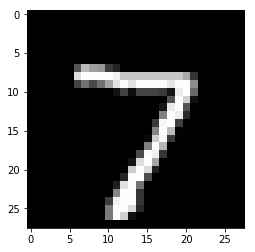

In [13]:
X_test1=X_test*255
X_test1=X_test1.reshape(10000,28,28)
for i in range(1):
    print("X_test%s, Prediksi=%s" % ([i], ynew[i]))
    plt.imshow(X_test1[i], cmap=plt.get_cmap('gray'))
    plt.show()